In [1]:
from google.colab import files
uploaded = files.upload()

Saving game_sessions_data.json to game_sessions_data.json


In [2]:
import json
import pandas as pd

with open("game_sessions_data.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,result,movesCount,moves,durationSeconds,timestamp
0,lose,170,"[left, up, right, right, down, left, up, right...",230.739,2025-05-16T12:49:25.096Z
1,win,145,"[up, right, down, left, down, right, down, lef...",780.878,2025-05-16T12:53:21.019Z
2,lose,122,"[up, left, up, left, up, left, up, left, up, l...",16.741,2025-05-16T13:06:28.037Z
3,win,174,"[down, right, up, left, up, right, down, up, l...",202.763,2025-05-16T13:06:50.391Z
4,lose,123,"[right, up, up, up, up, up, up, left, up, up, ...",44.709,2025-05-16T13:10:25.972Z


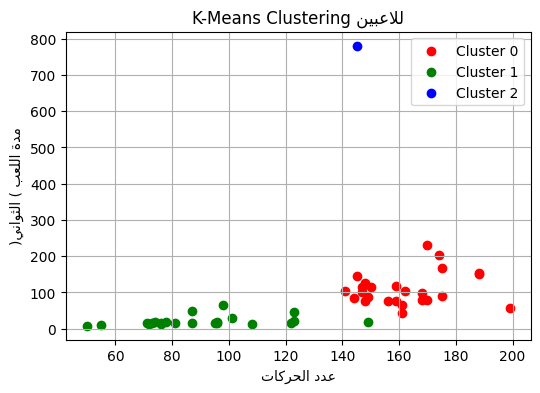

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# اختيار الأعمدة المستخدمة في التجميع
X_clustering = df[['movesCount', 'durationSeconds']]

# تطبيق نموذج KMeans مع 3 مجموعات
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering)

# عرض توزيع المجموعات
plt.figure(figsize=(6, 4))
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['movesCount'], cluster_data['durationSeconds'],
                label=f'Cluster {i}', color=colors[i])

plt.xlabel("ﺕﺎﻛﺮﺤﻟﺍ ﺩﺪﻋ")
plt.ylabel(")ﻲﻧﺍﻮﺜﻟﺍ ( ﺐﻌﻠﻟﺍ ﺓﺪﻣ")
plt.title("K-Means Clustering ﻦﻴﺒﻋﻼﻟ")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
print("عدد الجلسات:", len(df))
print("عدد الفوز:", (df['result'] == 'win').sum())
print("عدد الخسارة:", (df['result'] == 'lose').sum())
print("متوسط عدد الحركات:", df['movesCount'].mean())
print("متوسط المدة بالثواني:", df['durationSeconds'].mean())

عدد الجلسات: 48
عدد الفوز: 18
عدد الخسارة: 30
متوسط عدد الحركات: 128.91666666666666
متوسط المدة بالثواني: 82.9068125


In [4]:
!pip install plotly

In [5]:
import plotly.express as px

fig = px.scatter(
    df,
    x='movesCount',
    y='durationSeconds',
    color='result',
    title='📊 العلاقة بين عدد الحركات ومدة اللعب (تفاعلي)',
    labels={
        'movesCount': 'عدد الحركات',
        'durationSeconds': 'المدة (ثواني)',
        'result': 'النتيجة'
    }
)

fig.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# تحويل نتيجة الفوز إلى رقمية
df['label'] = df['result'].map({'win': 1, 'lose': 0})

X = df[['movesCount', 'durationSeconds']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.88      0.78      0.82         9

    accuracy                           0.80        15
   macro avg       0.79      0.81      0.80        15
weighted avg       0.81      0.80      0.80        15



In [7]:
# تجربة توقع على بيانات جديدة
example = pd.DataFrame([[120, 60]], columns=['movesCount', 'durationSeconds'])
pred = model.predict(example)
print("التوقع:", "فوز ✅" if pred[0] == 1 else "خسارة ❌")

التوقع: خسارة ❌
